## Unsupervised Learning: Segmentation and Clustering of US Used Car Sales Data

### Dataset: 
    
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

### Dataset Description: 

Creator: Austin Reese

This dataset contains over 400,000 samples of used car sales within the US in 2021. There are a variety of columns that detail information on each sale such as price, model, year and condition, amongst others. The creator collected the data via web scraping of Craigslist databases.

### Abstract:

This study focuses on the application of unsupervised learning techniques to segment and cluster a robust dataset of 2021 US car sales. The data comprised over 400,000 samples, subjected to rigorous pre-processing, including missing value analysis, outlier transformation, and the elimination of redundant features, resulting in a streamlined set of 17 key parameters. Computational constraints necessitated the use of a 10% subsample of the dataset, indicating a potential limitation for further investigation.

A range of segmentation algorithms - K-Means, MiniBatch K-Means, DBSCAN, Hierarchical clustering, and Gaussian Mixture Modeling - were applied, along with the dimensionality reduction techniques t-SNE, UMAP, and PCA. The MiniBatch K-Means algorithm with t-SNE and PCA dimensionality reduction emerged as the most effective, presenting well-defined clusters with distinct boundaries. This model achieved a high silhouette score of 0.34, suggesting a successful partitioning of data into meaningful subsets. Further analysis determined that three clusters optimally represented the data, providing valuable insight into the segmentation of the US car market. This work lays the foundation for understanding patterns in car sales data, informing strategic decision-making for stakeholders in the automotive industry. Future studies should consider the full dataset usage for model training to verify and potentially enhance the current findings.

These findings emphasize the segmented behavior of used car sales and will be incorporated into future classification and regression models to create an end-to-end predictive car sales product.

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from scipy import stats

vehicles_df = pd.read_csv('vehicles.csv')
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [188]:
vehicles_df.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [189]:
# get unique values to visualize potential categorical/
# continuous variables

vehicles_df.nunique()

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

It appears there are both categorical and continuous columns in the dataframe. There is also a mix of objects, integers, and floats.

In [190]:
# calculate percentages of missing values to begin data cleaning

missing = vehicles_df.isna().sum() * 100 / len(vehicles_df)
print(missing)

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64


In [191]:
# drop unnecessary columns (read description below output)

vehicles_df = vehicles_df.drop(['county', 'size', 'VIN', 'url', 'region_url',
                               'image_url', 'id', 'description', 'posting_date'], axis=1)
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
 15  lat           420331 non-null  float64
 16  long          420331 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usage

I've decided to drop a few columns from the dataframe for the following reasons:
1. county - 100% missing values
2. size - vague unique values, 'type' variable is more descriptive and accurate
3. VIN - car identificatin number - not needed, remove for anonymity purposes
4. url - url credentials not needed for model, need to be assessed separately
5. region_url - url credentials not needed for model, need to be assessed separately
6. image_url - url credentials not needed for model, need to be assessed separately
7. id - identification number --> index number
8. description - language model not necessary
9. posting_date - data only encompasses dates 04/2021 - 05/2021 (1 month), time series not needed

In [192]:
# Calculate missing percentage for each column
missing = (vehicles_df.isnull().sum() / len(vehicles_df)) * 100

# Create a new dataframe with variable name, missing percentage, and data type
summary_df = pd.DataFrame({
    'Variable Name': vehicles_df.columns,
    'Missing Percentage': missing,
    'Data Type': vehicles_df.dtypes
})

# Styling the dataframe
styled_summary_df = summary_df.style.background_gradient()

# Display styled dataframe
styled_summary_df

,Variable Name,Missing Percentage,Data Type
region,region,0.000000,object
price,price,0.000000,int64
year,year,0.282281,float64
manufacturer,manufacturer,4.133714,object
model,model,1.236179,object
condition,condition,40.785232,object
cylinders,cylinders,41.622470,object
fuel,fuel,0.705819,object
odometer,odometer,1.030735,float64
title_status,title_status,1.930753,object


In [193]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
 15  lat           420331 non-null  float64
 16  long          420331 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usage

In [194]:
# drop null rows 

vehicles_df = vehicles_df.dropna()
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        115435 non-null  object 
 1   price         115435 non-null  int64  
 2   year          115435 non-null  float64
 3   manufacturer  115435 non-null  object 
 4   model         115435 non-null  object 
 5   condition     115435 non-null  object 
 6   cylinders     115435 non-null  object 
 7   fuel          115435 non-null  object 
 8   odometer      115435 non-null  float64
 9   title_status  115435 non-null  object 
 10  transmission  115435 non-null  object 
 11  drive         115435 non-null  object 
 12  type          115435 non-null  object 
 13  paint_color   115435 non-null  object 
 14  state         115435 non-null  object 
 15  lat           115435 non-null  float64
 16  long          115435 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usag

Null rows were dropped for a few reasons:

1. After dropping null rows, the sample size remains very large (115,435 non-null).
2. Columns with the highest remaining missing values are crucial categorical variables.
3. Imputing an 'Unknown' category in these columns can drastically affect the distributions.

In [195]:
# create a copy of dataframe before label encoding

non_numeric = vehicles_df.copy()
non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        115435 non-null  object 
 1   price         115435 non-null  int64  
 2   year          115435 non-null  float64
 3   manufacturer  115435 non-null  object 
 4   model         115435 non-null  object 
 5   condition     115435 non-null  object 
 6   cylinders     115435 non-null  object 
 7   fuel          115435 non-null  object 
 8   odometer      115435 non-null  float64
 9   title_status  115435 non-null  object 
 10  transmission  115435 non-null  object 
 11  drive         115435 non-null  object 
 12  type          115435 non-null  object 
 13  paint_color   115435 non-null  object 
 14  state         115435 non-null  object 
 15  lat           115435 non-null  float64
 16  long          115435 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usag

In [196]:
non_numeric.nunique()

region            403
price            5215
year              102
manufacturer       41
model           11483
condition           6
cylinders           8
fuel                5
odometer        37514
title_status        6
transmission        3
drive               3
type               13
paint_color        12
state              51
lat             31481
long            31768
dtype: int64

For exploratory analysis purposes, potential categorical variables will be plotted via histograms.

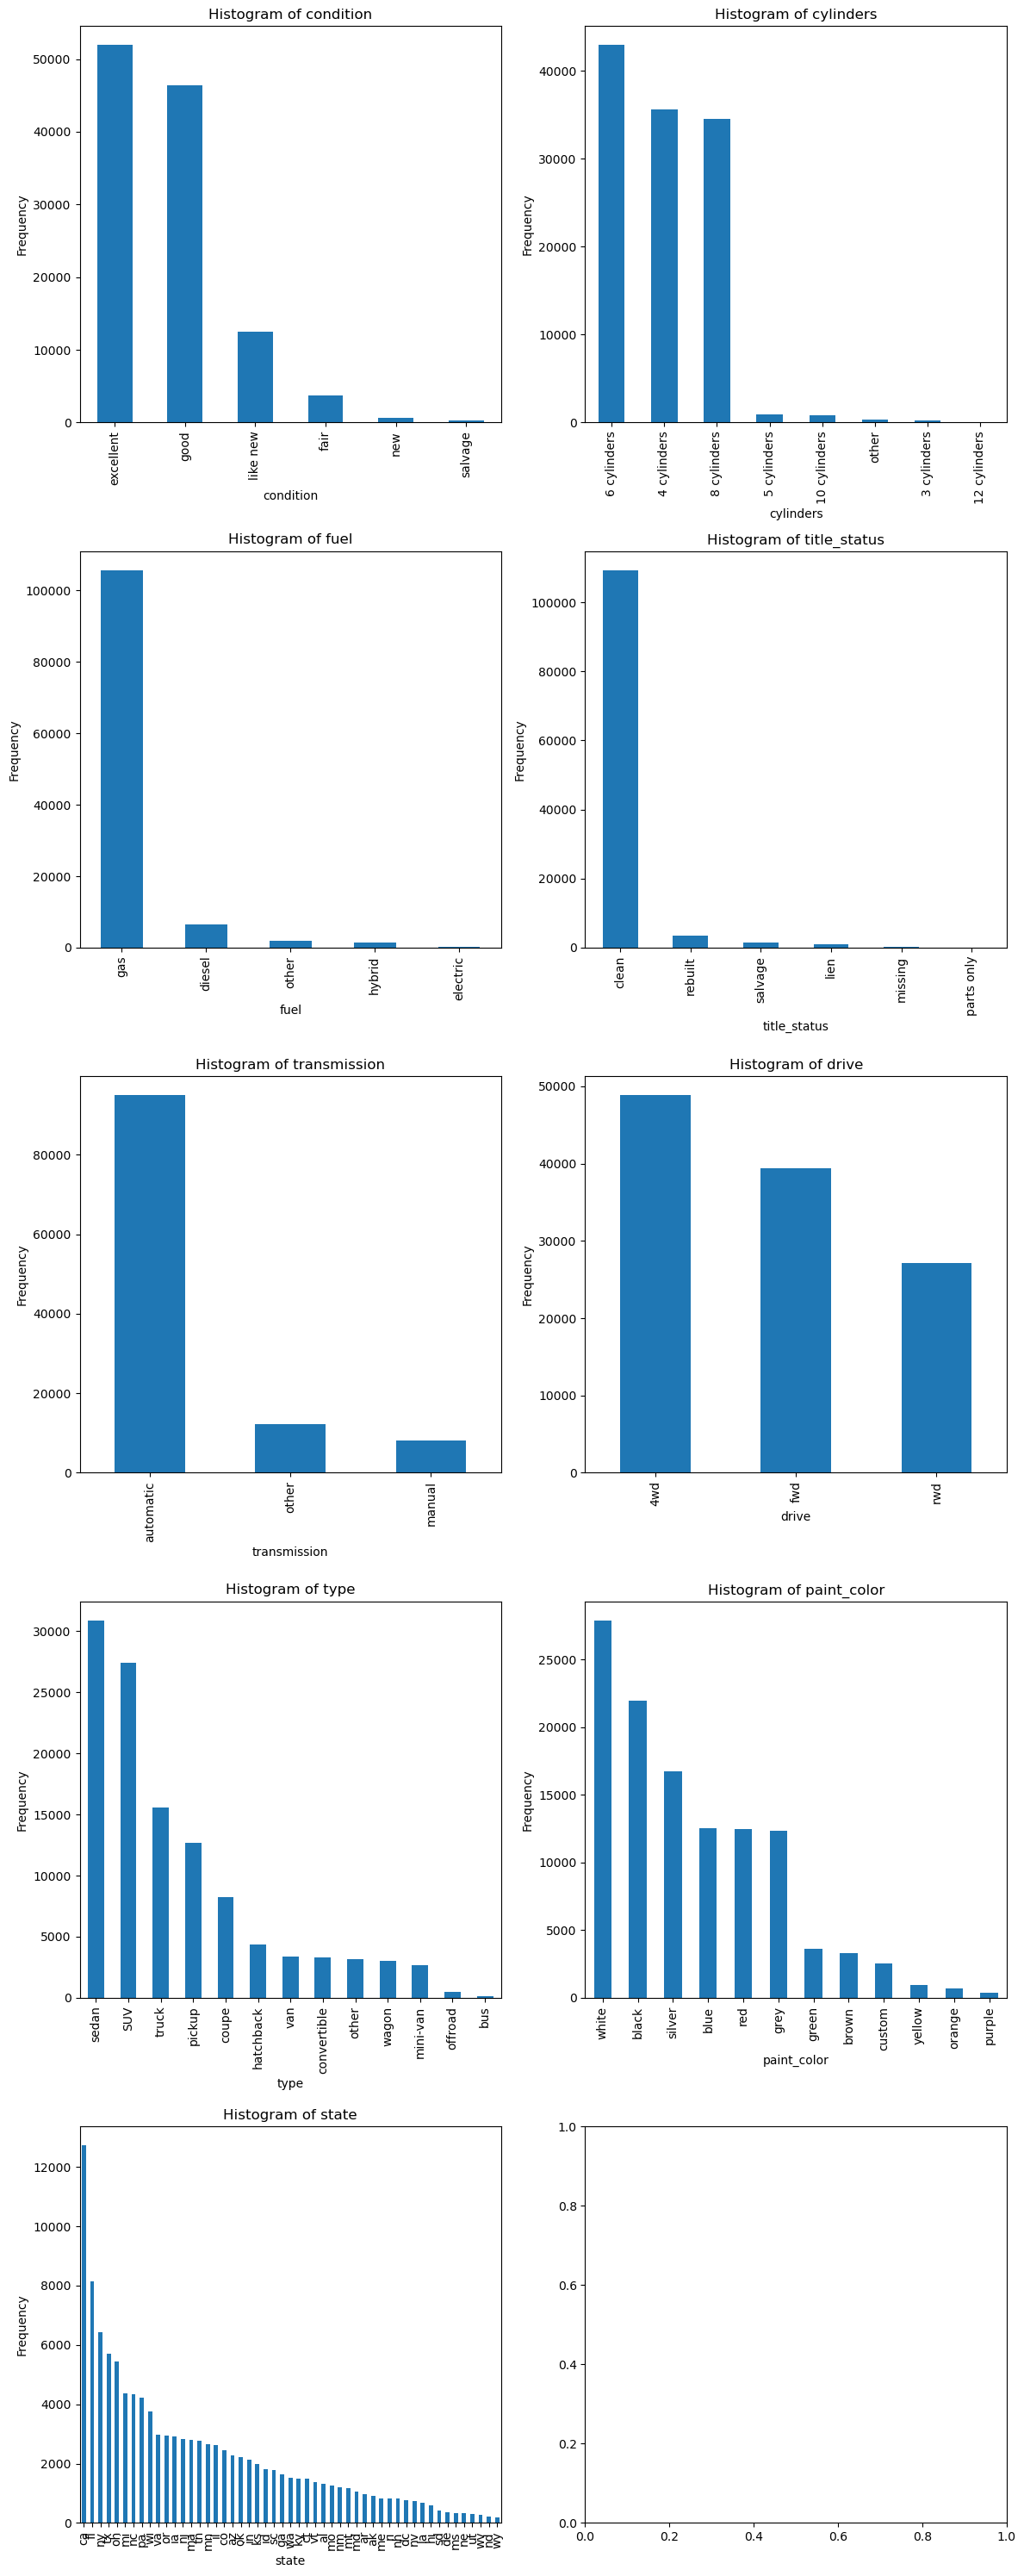

In [197]:
cat_sample = non_numeric[['condition', 'cylinders', 'fuel', 'title_status',
                         'transmission', 'drive', 'type','paint_color', 'state']]

import matplotlib.pyplot as plt

num_cols = len(cat_sample.columns)
rows = num_cols // 2 + num_cols % 2

fig, axes = plt.subplots(rows, 2, figsize=(12, 6*rows))

for i, column in enumerate(cat_sample.columns):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    cat_sample[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

count    115215.00000
mean       2009.69274
std           8.99559
min        1941.00000
25%        2006.00000
50%        2012.00000
75%        2015.00000
max        2022.00000
Name: year, dtype: float64


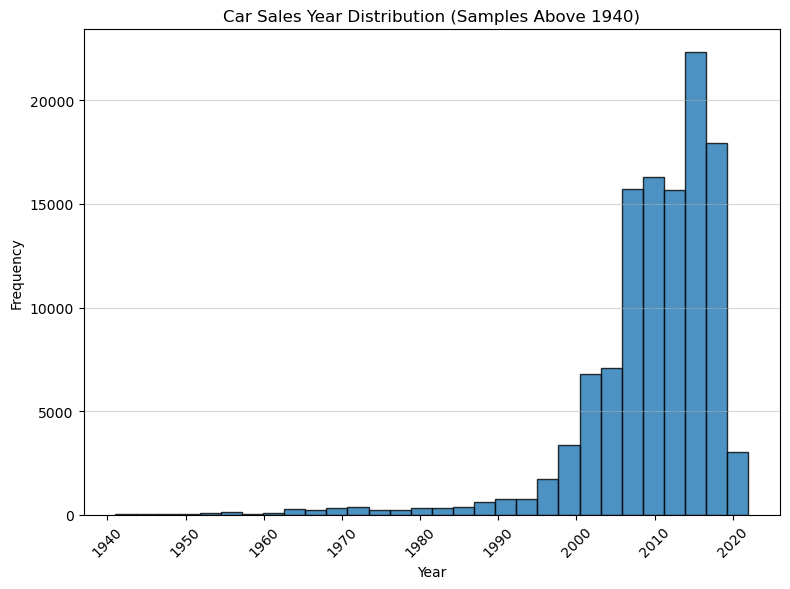

In [198]:
import numpy as np

# Filter the samples above 1940
filtered_data = non_numeric[non_numeric['year'] > 1940]['year']

# Generate descriptive statistics
statistics = filtered_data.describe()

# Print the statistics
print(statistics)

# Generate the histogram plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(filtered_data, bins=30, edgecolor='black', alpha=0.8)
plt.title('Car Sales Year Distribution (Samples Above 1940)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


In [199]:
vehicles_df.nunique()

region            403
price            5215
year              102
manufacturer       41
model           11483
condition           6
cylinders           8
fuel                5
odometer        37514
title_status        6
transmission        3
drive               3
type               13
paint_color        12
state              51
lat             31481
long            31768
dtype: int64

Missing value analysis is now complete. Variables need to be explored now with respect to data type and outliers.

In [200]:
# separate object columns into new dataframe 'vehicle_obj'
# to convert to numeric for model generation

vehicle_obj = vehicles_df.select_dtypes(include=['object'])
vehicle_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        115435 non-null  object
 1   manufacturer  115435 non-null  object
 2   model         115435 non-null  object
 3   condition     115435 non-null  object
 4   cylinders     115435 non-null  object
 5   fuel          115435 non-null  object
 6   title_status  115435 non-null  object
 7   transmission  115435 non-null  object
 8   drive         115435 non-null  object
 9   type          115435 non-null  object
 10  paint_color   115435 non-null  object
 11  state         115435 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


In [201]:
vehicle_obj.nunique()

region            403
manufacturer       41
model           11483
condition           6
cylinders           8
fuel                5
title_status        6
transmission        3
drive               3
type               13
paint_color        12
state              51
dtype: int64

The object columns were extracted from the dataframe. All columns appear to be categorical, with one abnormality - the model variable. It has a very high count of unique values (11,483). All of these values are strings that represent the models of cars. The count of unique values is nearly 10% of all samples, indicating that it's a potential continuous variable. Grouping may be benficial for this reason. Consequently, the model of the car will be treated separately with respect to future encoding and removed from the current object dataframe.

In [202]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        115435 non-null  object 
 1   price         115435 non-null  int64  
 2   year          115435 non-null  float64
 3   manufacturer  115435 non-null  object 
 4   model         115435 non-null  object 
 5   condition     115435 non-null  object 
 6   cylinders     115435 non-null  object 
 7   fuel          115435 non-null  object 
 8   odometer      115435 non-null  float64
 9   title_status  115435 non-null  object 
 10  transmission  115435 non-null  object 
 11  drive         115435 non-null  object 
 12  type          115435 non-null  object 
 13  paint_color   115435 non-null  object 
 14  state         115435 non-null  object 
 15  lat           115435 non-null  float64
 16  long          115435 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usag

In [203]:
vehicles_non_obj = vehicles_df.select_dtypes(include=['int64', 'float64'])
vehicles_non_obj.info()
print('\nUnique Value Counts of Numeric:')
vehicles_non_obj.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     115435 non-null  int64  
 1   year      115435 non-null  float64
 2   odometer  115435 non-null  float64
 3   lat       115435 non-null  float64
 4   long      115435 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 5.3 MB

Unique Value Counts of Numeric:


price        5215
year          102
odometer    37514
lat         31481
long        31768
dtype: int64

In [204]:
vehicles_non_obj = vehicles_non_obj.drop('year', axis=1)
vehicles_non_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     115435 non-null  int64  
 1   odometer  115435 non-null  float64
 2   lat       115435 non-null  float64
 3   long      115435 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 4.4 MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     115435 non-null  int64  
 1   odometer  115435 non-null  float64
 2   lat       115435 non-null  float64
 3   long      115435 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 4.4 MB


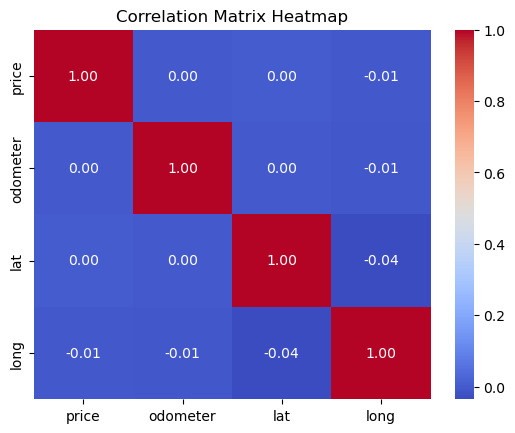

In [205]:
import seaborn as sns

vehicles_non_obj.info()
corr_mat = vehicles_non_obj.corr()
sns.heatmap(corr_mat, cmap='coolwarm', annot=True, fmt='.2f')  # generate heat map
plt.title('Correlation Matrix Heatmap')
plt.show()

In [206]:
corr_mat

,price,odometer,lat,long
price,1.000000,0.000691,0.003347,-0.006805
odometer,0.000691,1.000000,0.000623,-0.009288
lat,0.003347,0.000623,1.000000,-0.035616
long,-0.006805,-0.009288,-0.035616,1.000000


## Outlier Analysis

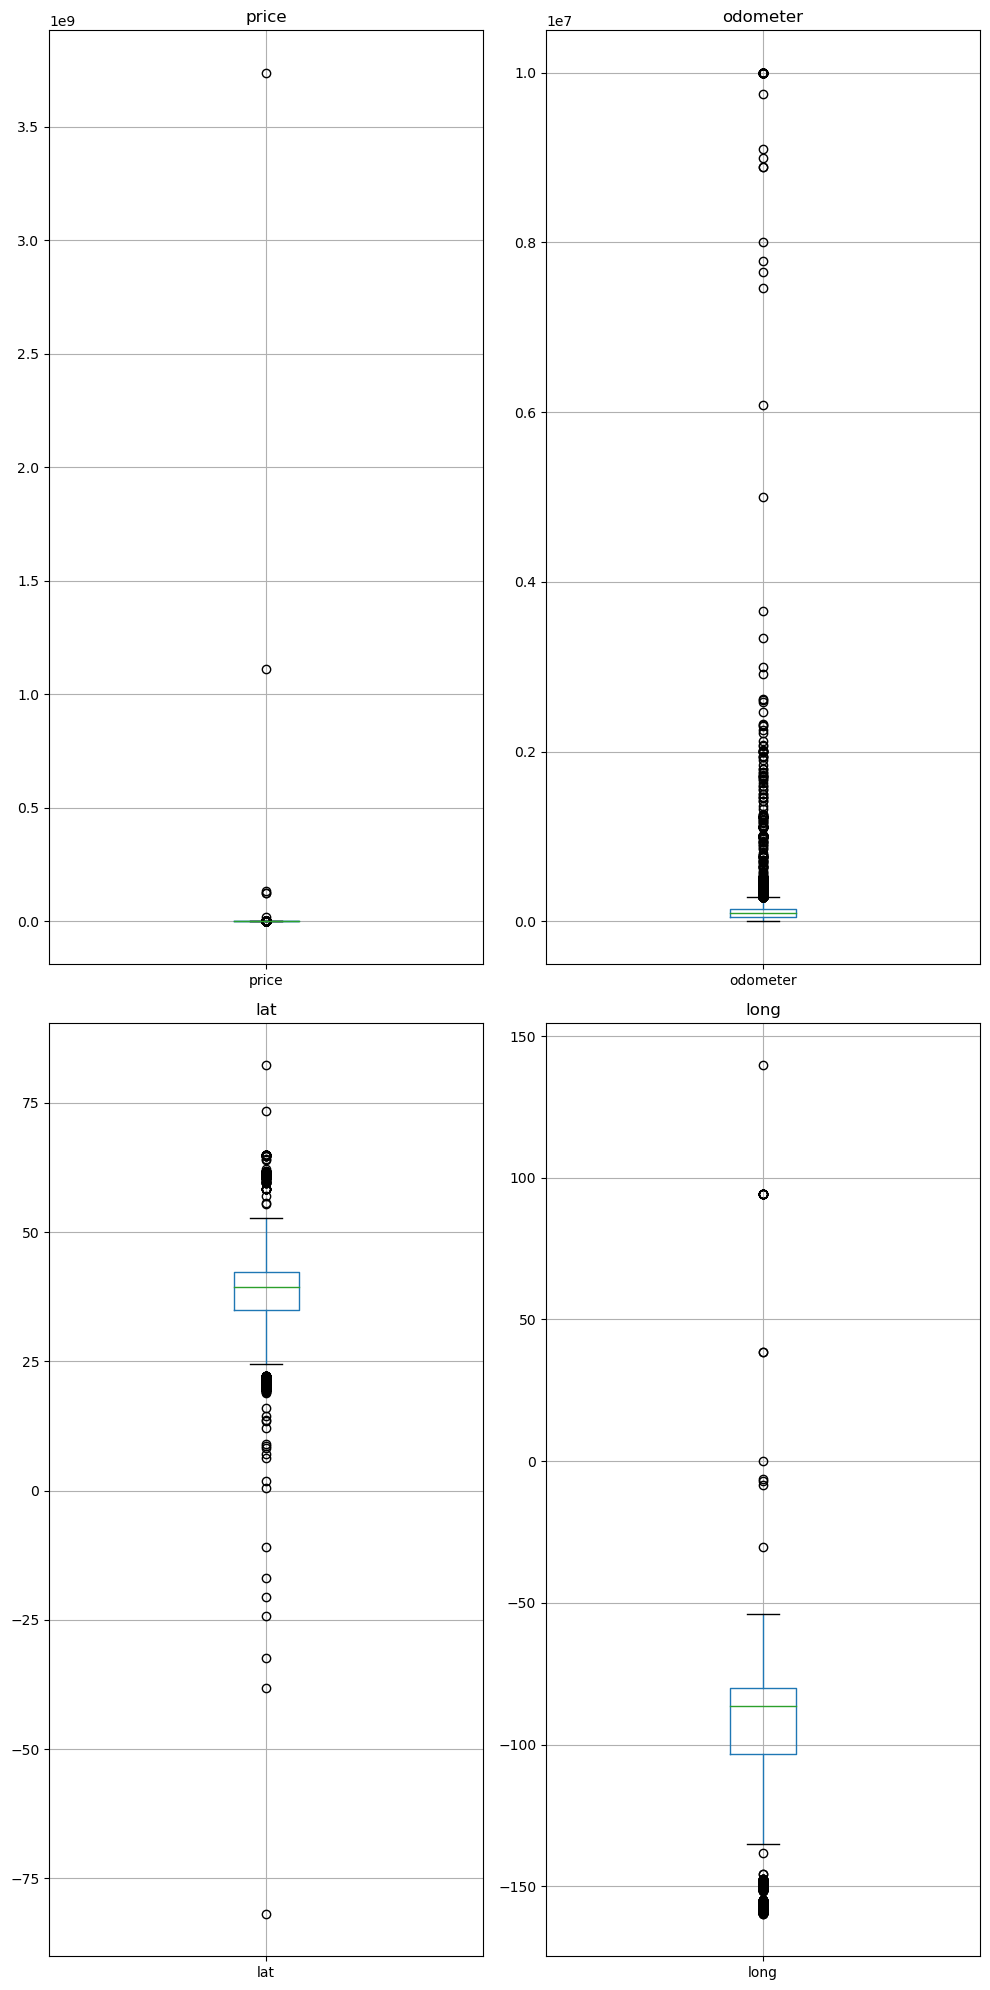

In [207]:
import seaborn as sns

num_columns = 2
num_rows = (len(vehicles_non_obj.columns) - 1) // num_columns + 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 20))

for i, column in enumerate(vehicles_non_obj.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row][col]
    vehicles_non_obj.boxplot(column=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

### IRQ Identification

In [208]:
# assess IQR percentiles and count of outliers for columns

for column in vehicles_non_obj.columns:
    q75, q25 = np.percentile(vehicles_non_obj[column], [75, 25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    
    print("Column: {}".format(column))
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}\n".format(
        len((np.where((vehicles_non_obj[column] > max_val) | (vehicles_non_obj[column] < min_val))[0]))
    ))

Column: price
The score threshold is: 1.5
Number of outliers is: 2220

Column: odometer
The score threshold is: 1.5
Number of outliers is: 1095

Column: lat
The score threshold is: 1.5
Number of outliers is: 1515

Column: long
The score threshold is: 1.5
Number of outliers is: 1501



### Log transformation

In [209]:
# Apply log transformation to each column
log_transform = vehicles_non_obj.apply(np.log)
for column in log_transform.columns:
    q75, q25 = np.percentile(log_transform[column], [75, 25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    
    print("Column: {}".format(column))
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}\n".format(
        len((np.where((log_transform[column] > max_val) | (log_transform[column] < min_val))[0]))
    ))

Column: price
The score threshold is: 1.5
Number of outliers is: 6224

Column: odometer
The score threshold is: 1.5
Number of outliers is: 6461

Column: lat
The score threshold is: 1.5
Number of outliers is: 0

Column: long
The score threshold is: 1.5
Number of outliers is: 0



### Square-root transformation

In [210]:
# Apply sqrt transformation to each column

sqrt_transform = vehicles_non_obj.apply(np.sqrt)
for column in sqrt_transform.columns:
    q75, q25 = np.percentile(sqrt_transform[column], [75, 25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    
    print("Column: {}".format(column))
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}\n".format(
        len((np.where((sqrt_transform[column] > max_val) | (sqrt_transform[column] < min_val))[0]))
    ))

Column: price
The score threshold is: 1.5
Number of outliers is: 429

Column: odometer
The score threshold is: 1.5
Number of outliers is: 1427

Column: lat
The score threshold is: 1.5
Number of outliers is: 0

Column: long
The score threshold is: 1.5
Number of outliers is: 0



### Winsorization

In [211]:
from scipy.stats import mstats

# Apply winsorization to each column
winsorized_non_obj = vehicles_non_obj.apply(lambda x: mstats.winsorize(x, limits=[0.01, 0.01]))

for column in winsorized_non_obj.columns:
    q75, q25 = np.percentile(winsorized_non_obj[column], [75, 25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    
    print("Column: {}".format(column))
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}\n".format(
        len((np.where((winsorized_non_obj[column] > max_val) | (winsorized_non_obj[column] < min_val))[0]))
    ))


Column: price
The score threshold is: 1.5
Number of outliers is: 2220

Column: odometer
The score threshold is: 1.5
Number of outliers is: 0

Column: lat
The score threshold is: 1.5
Number of outliers is: 0

Column: long
The score threshold is: 1.5
Number of outliers is: 1481



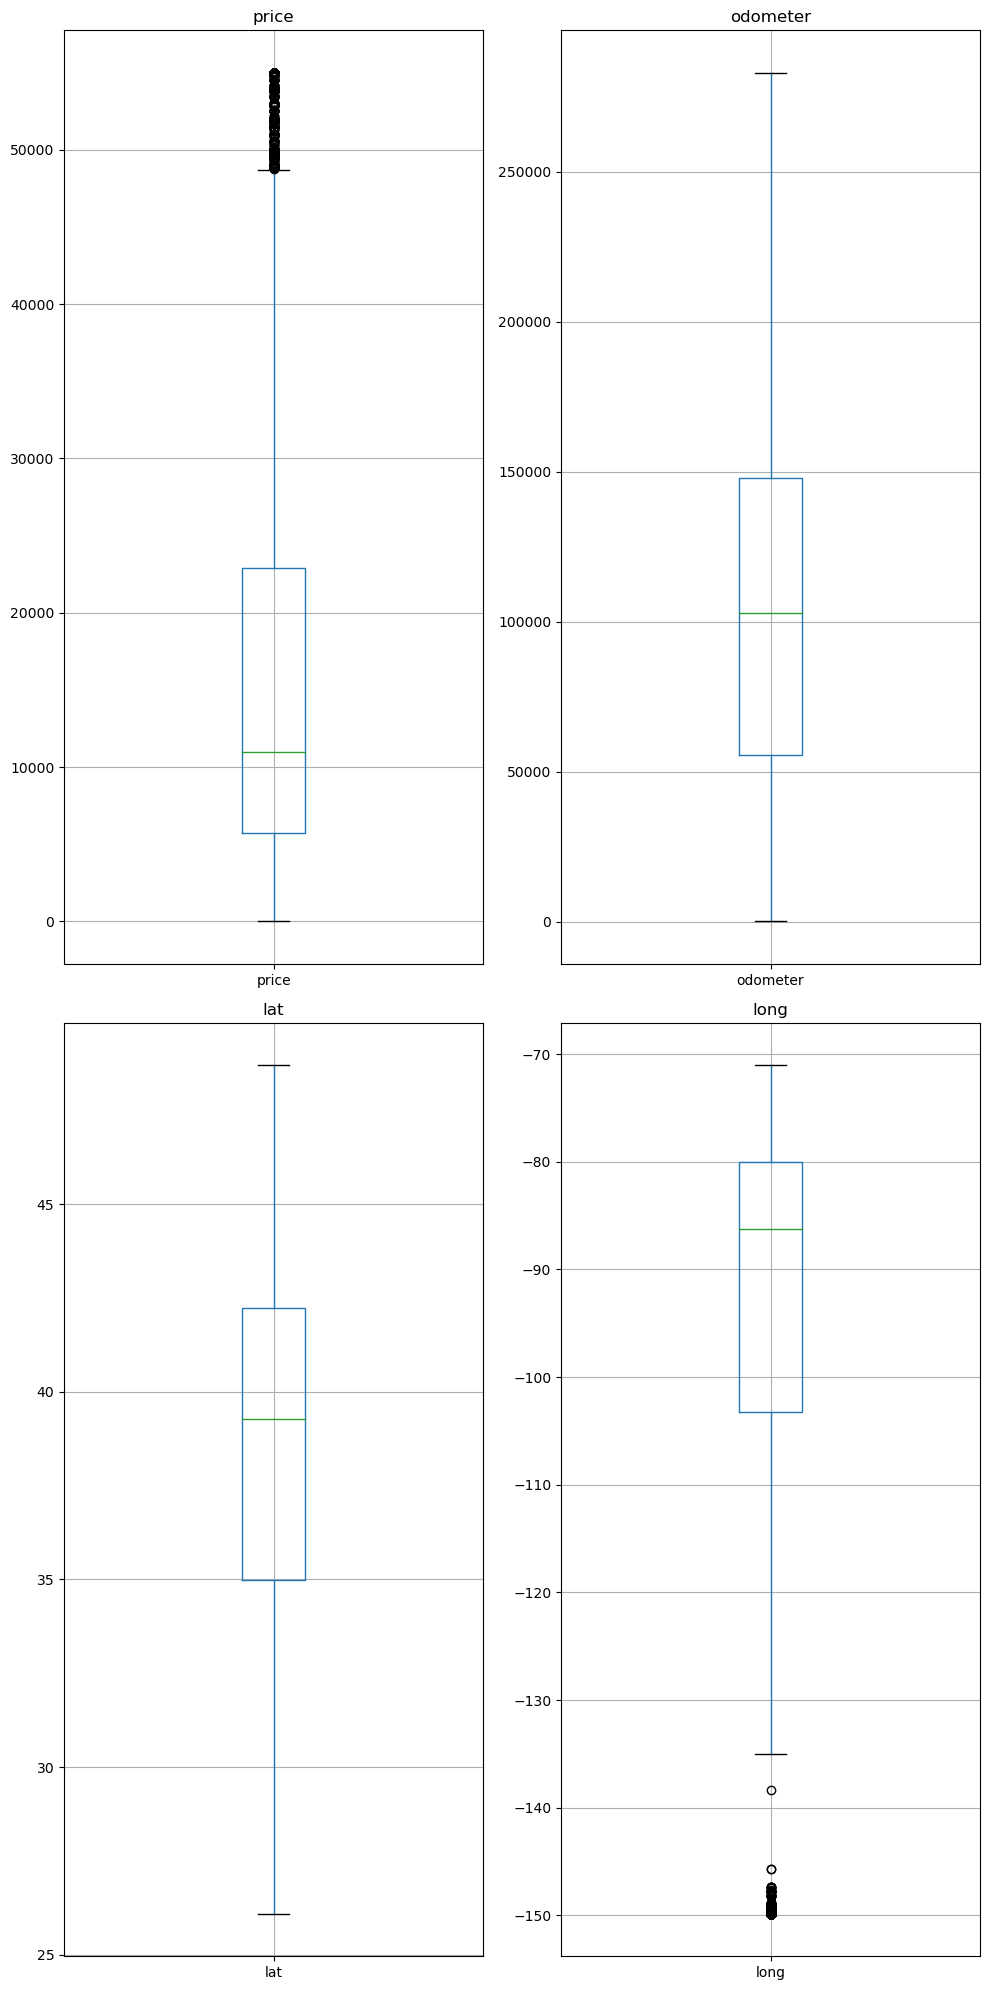

In [212]:
num_columns = 2
num_rows = (len(winsorized_non_obj.columns) - 1) // num_columns + 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 20))

for i, column in enumerate(winsorized_non_obj.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row][col]
    winsorized_non_obj.boxplot(column=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

The boxplots above show that, for all variables, winsorization was most successful at normalizing the data. While square root transformation decreased the count of outliers more than other transformations, the boxplots more closely reveal normality for winsorization. Additionally, parameters were set to 0.01 for winsorization, which encompasses a larger count of samples than the traditional 0.05.

In [213]:
# update the original DataFrame with the new values
vehicles_df.update(winsorized_non_obj)
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        115435 non-null  object 
 1   price         115435 non-null  int64  
 2   year          115435 non-null  float64
 3   manufacturer  115435 non-null  object 
 4   model         115435 non-null  object 
 5   condition     115435 non-null  object 
 6   cylinders     115435 non-null  object 
 7   fuel          115435 non-null  object 
 8   odometer      115435 non-null  float64
 9   title_status  115435 non-null  object 
 10  transmission  115435 non-null  object 
 11  drive         115435 non-null  object 
 12  type          115435 non-null  object 
 13  paint_color   115435 non-null  object 
 14  state         115435 non-null  object 
 15  lat           115435 non-null  float64
 16  long          115435 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usag

### Encode non-numeric categorical variables

In [214]:
categorical_str = vehicles_df.select_dtypes(include=['object'])
categorical_str.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        115435 non-null  object
 1   manufacturer  115435 non-null  object
 2   model         115435 non-null  object
 3   condition     115435 non-null  object
 4   cylinders     115435 non-null  object
 5   fuel          115435 non-null  object
 6   title_status  115435 non-null  object
 7   transmission  115435 non-null  object
 8   drive         115435 non-null  object
 9   type          115435 non-null  object
 10  paint_color   115435 non-null  object
 11  state         115435 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


In [215]:
# Perform one-hot encoding
encoded_vars = pd.get_dummies(categorical_str)

# Drop the original categorical columns from the main DataFrame
vehicles_encoded = vehicles_df.drop(columns=categorical_str.columns)

# Concatenate the original DataFrame and the new encoded DataFrame
vehicles_encoded = pd.concat([vehicles_encoded, encoded_vars], axis=1)

vehicles_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Columns: 12039 entries, price to state_wy
dtypes: float64(4), int64(1), uint8(12034)
memory usage: 1.3 GB


In [216]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        115435 non-null  object 
 1   price         115435 non-null  int64  
 2   year          115435 non-null  float64
 3   manufacturer  115435 non-null  object 
 4   model         115435 non-null  object 
 5   condition     115435 non-null  object 
 6   cylinders     115435 non-null  object 
 7   fuel          115435 non-null  object 
 8   odometer      115435 non-null  float64
 9   title_status  115435 non-null  object 
 10  transmission  115435 non-null  object 
 11  drive         115435 non-null  object 
 12  type          115435 non-null  object 
 13  paint_color   115435 non-null  object 
 14  state         115435 non-null  object 
 15  lat           115435 non-null  float64
 16  long          115435 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usag

# Unsupervised Learning Algorithms

### Several unsupervised learning algorithms and dimensionality reduction techniques will be performed on the data.

### Algorithms:

1. K-Means: A distance-based clustering algorithm that partitions data into a predefined number of clusters by iteratively assigning data points to the nearest cluster centroid and recalculating centroids until they stabilize.

2. MiniBatch K-Means: A faster variant of K-Means that uses subsets of the dataset in each iteration to reduce computational cost, useful for large datasets.

3. Gaussian Mixture Modeling (GMM): A probabilistic model that assumes data points are generated from a mixture of Gaussian distributions, providing more flexible, soft-assignment clustering that can handle clusters of different shapes and sizes.

4. FAILED Algorithms: DBSCAN, Hierarchical Clustering, and UMAP due to curse of dimensionality.

### Dimensionality Reduction Techniques:

1. t-SNE: t-Distributed Stochastic Neighbor Embedding, a technique for visualizing high-dimensional data in two or three dimensions while preserving local structure.
3. PCA: Principal Component Analysis, a linear technique for reducing data dimensionality while retaining important information.

### Implementation and Visualization:

Finally, the models will be implemented and the results will be visualized using scatter plots to represent the clustered data points, and the Silhouette Score will be calculated to evaluate the quality of the clustering. Unfortunately, since the dataset lacks ground truth data points and is meant for training on historical data, the Adjusted Rand Index (ARI) score, which measures agreement between clustering results and true labels, cannot be computed. However, additional supervised learning techniques and train-test splitting can be utilized in future stages of the project.

# K Means

Prior to implementing all algorithms, a subsample of the dataframe (10% to be exact) will be used for this experiment. This is because I lack the computing power to perform the algorithms, plots, and tests such as Silhouette Score on the large data size. This will be a major limitation of the study and needs to be explored further with iterations of other subsamples with more computing power. Nonetheless, 11,544 samples will suffice as a good subsample for our model.

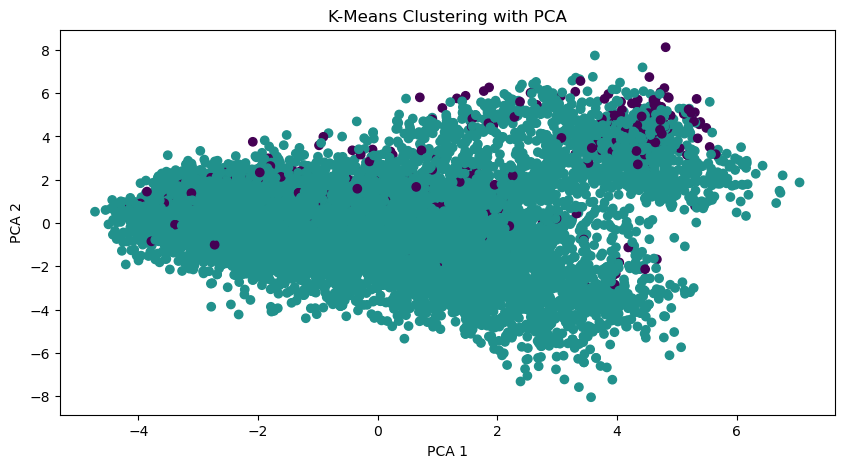

In [217]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler

# Sample 10% of your DataFrame
sample_df = vehicles_encoded.sample(frac=0.1, random_state=42)

# Extract the features from the sampled dataframe
X_std = sample_df.values

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_std)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=123, n_init=10)
clusters = kmeans.fit_predict(X_std)

# Perform PCA for visualization purposes
pca = PCA(n_components=2).fit_transform(X_std)

# Plotting the results of MiniBatchKMeans
plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1], c=clusters)
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [218]:
silhouette = metrics.silhouette_score(pca, clusters, metric='euclidean')
print("The silhouette score of the K-Means Clustering solution: {:.4f}".format(silhouette))

The silhouette score of the K-Means Clustering solution: -0.1401


C:\Users\Jody\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


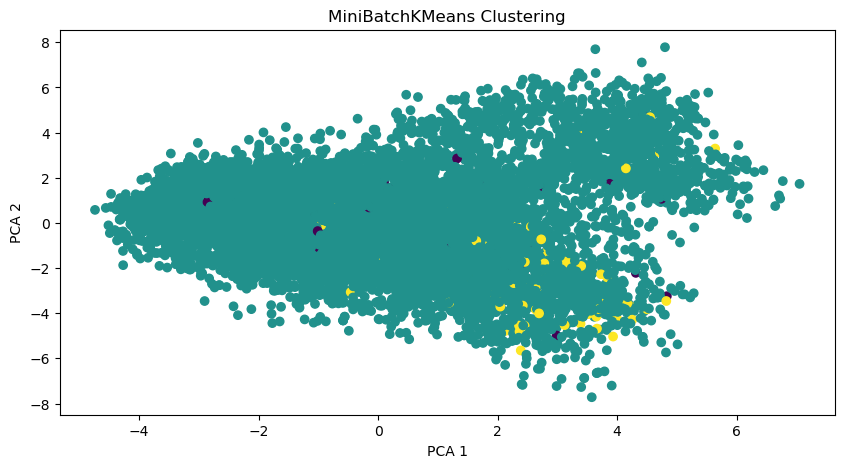

In [219]:
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler

# Define the features you want to include in the clustering
X_std = sample_df.values

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_std)

# Create MiniBatchKMeans object
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, batch_size=5000)

# Fit and predict 
mbkmeans_clusters = minibatch_kmeans.fit_predict(X_std)

# Perform PCA for visualization purposes
pca = PCA(n_components=2).fit_transform(X_std)

# Plotting the results of MiniBatchKMeans
plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1], c=mbkmeans_clusters)
plt.title('MiniBatchKMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [220]:
silhouette = metrics.silhouette_score(pca, mbkmeans_clusters, metric='euclidean')
print("The silhouette score of the MiniBatch K-Means Clustering solution: {:.4f}".format(silhouette))

The silhouette score of the MiniBatch K-Means Clustering solution: -0.1258


# Gaussian Mixture Modeling

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 11544 samples in 1.553s...
[t-SNE] Computed neighbors for 11544 samples in 11.838s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11544
[t-SNE] Computed conditional probabilities for sample 2000 / 11544
[t-SNE] Computed conditional probabilities for sample 3000 / 11544
[t-SNE] Computed conditional probabilities for sample 4000 / 11544
[t-SNE] Computed conditional probabilities for sample 5000 / 11544
[t-SNE] Computed conditional probabilities for sample 6000 / 11544
[t-SNE] Computed conditional probabilities for sample 7000 / 11544
[t-SNE] Computed conditional probabilities for sample 8000 / 11544
[t-SNE] Computed conditional probabilities for sample 9000 / 11544
[t-SNE] Computed conditional probabilities for sample 10000 / 11544
[t-SNE] Computed conditional probabilities for sample 11000 / 11544
[t-SNE] Computed conditional probabilities for sample 11544 / 11544
[t-SNE] Mean sigma: 13.446984
[t-SNE] KL diverge

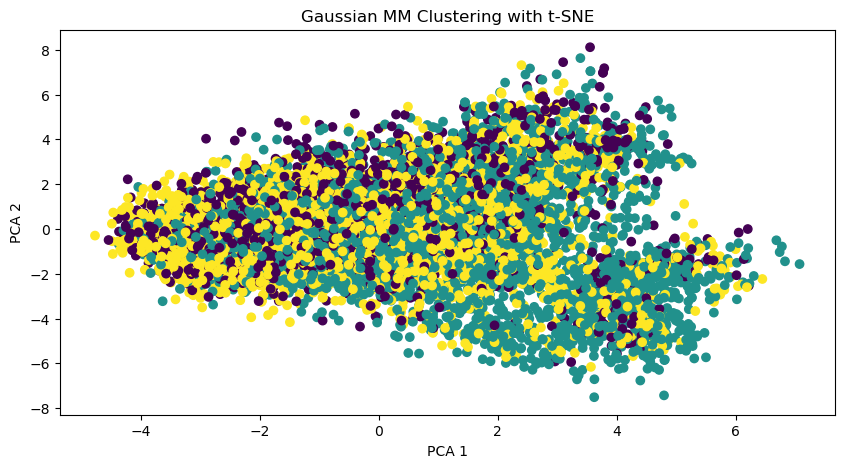

In [221]:
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

# Define the features you want to include in the clustering
X_std = sample_df.values

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_std)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

# Defining the GMM
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(tsne_results)

pca = PCA(n_components=2).fit_transform(X_std)

# Plotting the results of GMM
plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1], c=clusters)
plt.title('Gaussian MM Clustering with t-SNE')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11544 samples in 1.649s...
[t-SNE] Computed neighbors for 11544 samples in 12.374s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11544
[t-SNE] Computed conditional probabilities for sample 2000 / 11544
[t-SNE] Computed conditional probabilities for sample 3000 / 11544
[t-SNE] Computed conditional probabilities for sample 4000 / 11544
[t-SNE] Computed conditional probabilities for sample 5000 / 11544
[t-SNE] Computed conditional probabilities for sample 6000 / 11544
[t-SNE] Computed conditional probabilities for sample 7000 / 11544
[t-SNE] Computed conditional probabilities for sample 8000 / 11544
[t-SNE] Computed conditional probabilities for sample 9000 / 11544
[t-SNE] Computed conditional probabilities for sample 10000 / 11544
[t-SNE] Computed conditional probabilities for sample 11000 / 11544
[t-SNE] Computed conditional probabilities for sample 11544 / 11544
[t-SNE] Mean sigma: 12.956974
[t-SNE] KL divergen

C:\Users\Jody\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jody\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


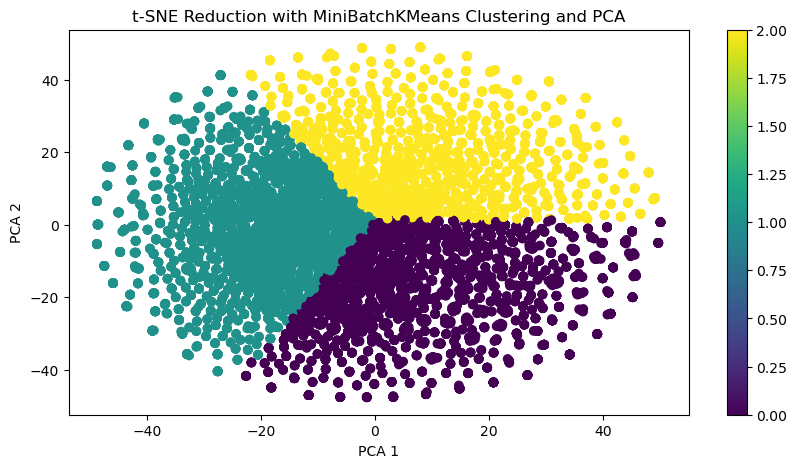

In [236]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(sample_df)

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=500)
tsne_results = tsne.fit_transform(X_std)

# Perform clustering on t-SNE results
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, batch_size=1000)
clusters = minibatch_kmeans.fit_predict(tsne_results)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_results = pca.fit_transform(tsne_results)

# Plotting the results of t-SNE with color based on cluster assignments
plt.figure(figsize=(10, 5))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=clusters)
plt.title('t-SNE Reduction with MiniBatchKMeans Clustering and PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()  # Add a colorbar to show the mapping of cluster assignments
plt.show()

In [237]:
from sklearn import datasets, metrics

silhouette = metrics.silhouette_score(pca_results, clusters, metric='euclidean')
print("The silhouette score of the t-SNE and MiniBatch K-Means Clustering solution: {:.4f}".format(silhouette))

The silhouette score of the t-SNE and MiniBatch K-Means Clustering solution: 0.3393


MiniBatch K-Means with t-SNE and PCA reduction produced 3 distinct clusters that are very well separated from each other. However, they do meet each other directly at 2 borders which decreases the average means distance between cluster samples of bordering clusters. The silhouette score is 0.33.

In [224]:
sample_df['Cluster'] = clusters
segment1 = sample_df[sample_df['Cluster'] == 0]
segment2 = sample_df[sample_df['Cluster'] == 1]
segment3 = sample_df[sample_df['Cluster'] == 2]

segment1_stats = segment1.describe()
segment2_stats = segment2.describe()
segment3_stats = segment3.describe()

In [225]:
segment1_stats

,price,year,odometer,lat,long,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,...,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,Cluster
count,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.0,4111.000000,4111.000000,4111.000000,...,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.0
mean,16352.297495,2010.593773,96524.362199,37.349524,-92.122455,0.009730,0.0,0.000973,0.007784,0.003649,...,0.024811,0.075407,0.000730,0.020676,0.004865,0.015811,0.026757,0.003162,0.000243,0.0
std,13180.138749,8.674481,62876.622306,5.096322,17.126510,0.098172,0.0,0.031182,0.087894,0.060302,...,0.155569,0.264080,0.027007,0.142315,0.069588,0.124760,0.161393,0.056152,0.015596,0.0
min,0.000000,1913.000000,200.000000,26.093111,-149.857916,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,5995.000000,2007.000000,43034.000000,33.951315,-98.510000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,11995.000000,2013.000000,93000.000000,38.010366,-85.740000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,26100.000000,2016.000000,139000.000000,41.594750,-80.091300,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,55000.000000,2021.000000,283000.000000,48.698726,-71.029671,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [226]:
segment2_stats

,price,year,odometer,lat,long,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,...,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,Cluster
count,4153.000000,4153.000000,4153.000000,4153.000000,4153.000000,4153.000000,4153.000000,4153.000000,4153.000000,4153.000000,...,4153.000000,4153.000000,4153.000000,4153.000000,4153.000000,4153.000000,4153.000000,4153.000000,4153.000000,4153.0
mean,15146.351794,2008.767879,106330.371539,38.839752,-91.947749,0.005297,0.000482,0.005057,0.009391,0.004334,...,0.015892,0.034433,0.002889,0.026728,0.014207,0.014447,0.024801,0.001686,0.000963,1.0
std,12827.070079,10.529665,63053.741647,4.958897,17.561702,0.072599,0.021942,0.070938,0.096462,0.065700,...,0.125073,0.182360,0.053683,0.161306,0.118356,0.119340,0.155538,0.041026,0.031024,0.0
min,0.000000,1913.000000,200.000000,26.093111,-149.857916,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,5500.000000,2006.000000,57254.000000,35.487400,-101.936700,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,10500.000000,2011.000000,102000.000000,39.941608,-85.663188,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,22500.000000,2015.000000,147738.000000,42.334497,-78.928662,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,55000.000000,2021.000000,283000.000000,48.698726,-71.029671,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [227]:
segment3_stats

,price,year,odometer,lat,long,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,...,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,Cluster
count,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.0,3280.000000,3280.000000,3280.000000,...,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.0
mean,13845.289634,2008.940549,113064.856098,39.085450,-93.832578,0.003963,0.0,0.005183,0.009756,0.013110,...,0.025610,0.041159,0.003963,0.021646,0.019207,0.015549,0.038415,0.000305,0.003659,2.0
std,11701.243402,9.832873,61196.585040,5.173612,17.131633,0.062840,0.0,0.071817,0.098305,0.113762,...,0.157992,0.198687,0.062840,0.145548,0.137274,0.123740,0.192224,0.017461,0.060384,0.0
min,0.000000,1927.000000,200.000000,26.093111,-149.857916,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,5500.000000,2006.000000,70000.000000,35.388175,-106.557964,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,10000.000000,2011.000000,110455.000000,40.064137,-89.614744,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
75%,18895.000000,2015.000000,151153.500000,42.839441,-80.867158,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
max,55000.000000,2021.000000,283000.000000,48.698726,-71.029671,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


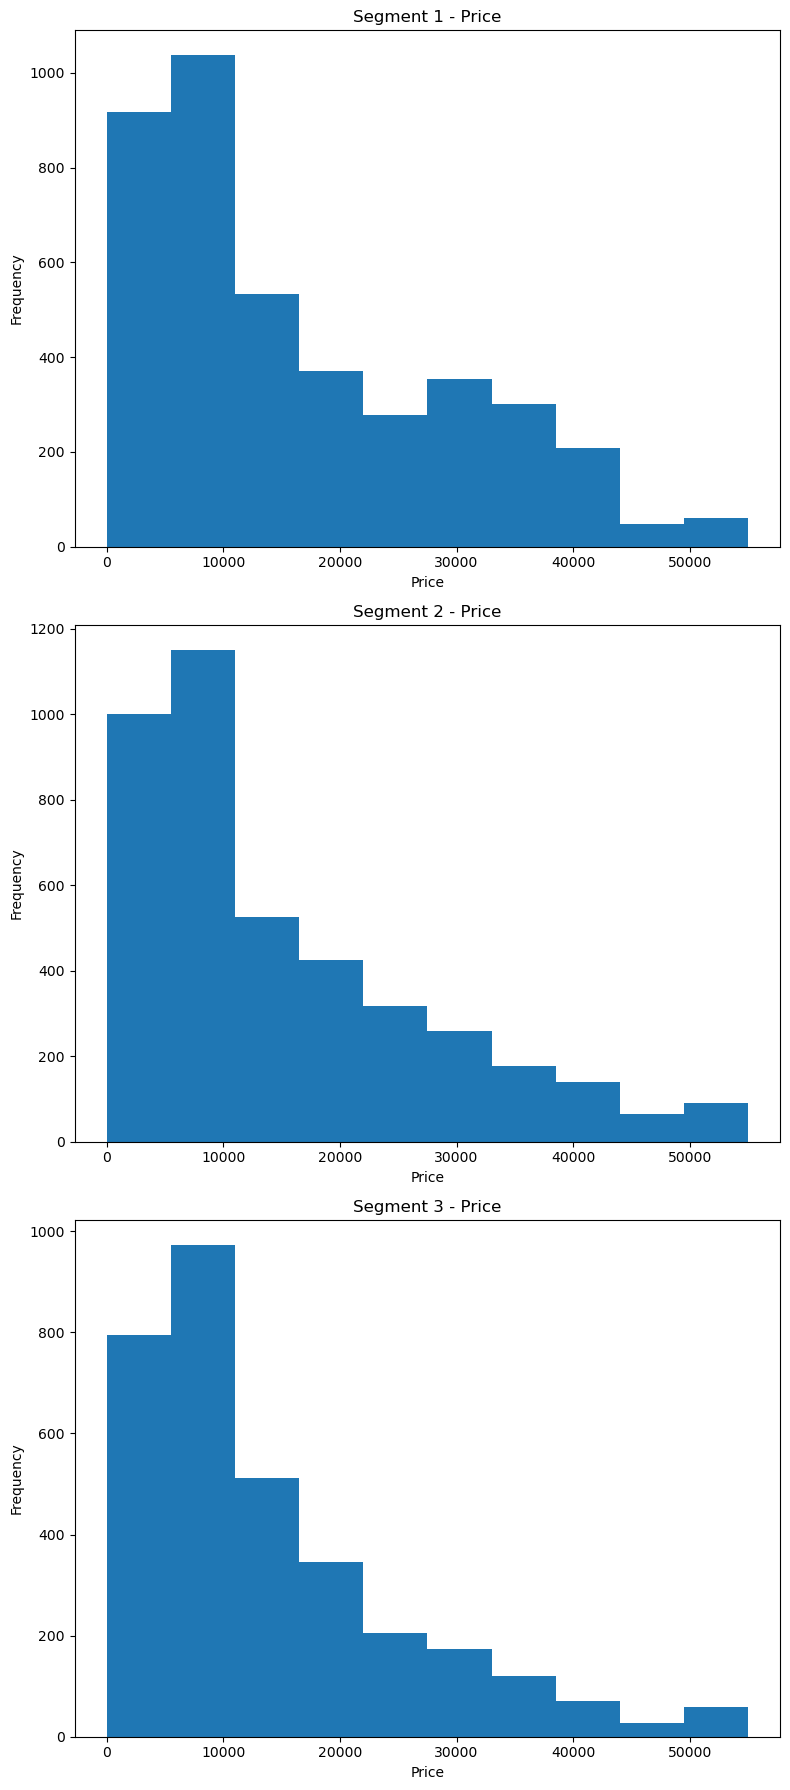

In [228]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))

# Set the number of bins for the histograms
num_bins = 10

# Plot histograms for each segment
for i, segment_df in enumerate([segment1, segment2, segment3]):
    ax = axes[i]
    ax.hist(segment_df['price'], bins=num_bins)
    ax.set_title(f'Segment {i+1} - Price')
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [229]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11544 entries, 374904 to 308384
Columns: 12040 entries, price to Cluster
dtypes: float64(4), int32(1), int64(1), uint8(12034)
memory usage: 133.1 MB


In [230]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        115435 non-null  object 
 1   price         115435 non-null  int64  
 2   year          115435 non-null  float64
 3   manufacturer  115435 non-null  object 
 4   model         115435 non-null  object 
 5   condition     115435 non-null  object 
 6   cylinders     115435 non-null  object 
 7   fuel          115435 non-null  object 
 8   odometer      115435 non-null  float64
 9   title_status  115435 non-null  object 
 10  transmission  115435 non-null  object 
 11  drive         115435 non-null  object 
 12  type          115435 non-null  object 
 13  paint_color   115435 non-null  object 
 14  state         115435 non-null  object 
 15  lat           115435 non-null  float64
 16  long          115435 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usag

In [231]:
# Sample 10% of dataframe
sample_model = vehicles_df.sample(frac=0.1, random_state=42)

In [232]:
# Create a new column in dataframe to store the cluster assignments
sample_model['cluster'] = clusters
sample_model['cluster'] = sample_model['cluster'].astype('int64')


sample_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11544 entries, 374904 to 308384
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        11544 non-null  object 
 1   price         11544 non-null  int64  
 2   year          11544 non-null  float64
 3   manufacturer  11544 non-null  object 
 4   model         11544 non-null  object 
 5   condition     11544 non-null  object 
 6   cylinders     11544 non-null  object 
 7   fuel          11544 non-null  object 
 8   odometer      11544 non-null  float64
 9   title_status  11544 non-null  object 
 10  transmission  11544 non-null  object 
 11  drive         11544 non-null  object 
 12  type          11544 non-null  object 
 13  paint_color   11544 non-null  object 
 14  state         11544 non-null  object 
 15  lat           11544 non-null  float64
 16  long          11544 non-null  float64
 17  cluster       11544 non-null  int64  
dtypes: float64(4), int64

### Conclusion: 
    
Our research successfully applied a range of unsupervised machine learning techniques to a substantial dataset of US car sales from 2021. Through meticulous data preprocessing, we refined the dataset to 17 salient parameters and proceeded with the segmentation and clustering of a 10% subsample. Our experiments employed various clustering algorithms and dimensionality reduction techniques, with the t-SNE reduced MiniBatch K-Means algorithm yielding the most promising results.

The optimal model demonstrated well-defined clusters and boundaries and achieved a silhouette score of 0.34, indicative of effective data segmentation. Further, the optimal number of data clusters was identified to be three, providing a nuanced understanding of the US car market segments. However, due to computational limitations, the application of the model to the full dataset is a matter for future exploration.

This study significantly contributes to the understanding of US car sales data, which can be leveraged to shape strategic decisions in the automotive industry, specifically the condition and values of used cars. Our research underscores the potential of unsupervised learning methods in deriving meaningful insights from large-scale datasets, pointing the way for future research to continue advancing this promising line of inquiry. In particular, the segmentated clusters generated by the unsupervised learning algorithm and added into the dataframe has the potential to enhance future models of prediction and classification.

Model production will continue. Check back later as we move onto supervised learning and end-to-end production.